**The Gambler's Problem is a classic problem in reinforcement learning where a gambler has to decide how much money to bet in order to reach a target goal. Undiscounted, Episodic, finite MDP.**

State value function: gives the probabilility of winning from each state.

Policy: mapping from levels of capital to stake.

Optimal Policy: maximizes the probability of reaching the goal.


In [ ]:
import gym
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#prob_head: Probability of the coin showing heads. heads- wins ; tails - loses
#theta: Threshold for stopping iteration (default value is 0.0001). The threshold for stopping iteration (0.0001 by default) in the Gambler's Problem is like setting a rule for when to stop trying to make our predictions better.
#gamma: Discount factor (default value is 1.0). The discount factor helps us decide how much we value future rewards compared to immediate rewards.

def gamblers_prob_val_it(prob_head, theta=0.0001, gamma=1.0):
  rewards = np.zeros(101) #  Initialize an array rewards of size 101 with all elements as 0.
  rewards[100] = 1 # The index 100 represents the goal state, and the reward for reaching the goal is set to 1.
  V = np.zeros(101)  #Initialize an array V of size 101 with all elements as 0. This array represents the value function for each state.

  #It calculates the expected action (bet amount) in the current state.
  def next_step(state, Value, rewards):
    A = np.zeros(101) #Initialize an array of action values of size 101 with all elements as 0.

    '''The variable stakes represents the range of possible bets that the gambler can make in a given state.
    state represents the current amount of money the gambler has.
    100 - state: This represents the maximum amount of money the gambler could potentially win from their current state without exceeding the target goal of 100.
    min(state, 100-state): It finds the minimum value between the current amount of money the gambler has and the maximum amount they could potentially win without exceeding the goal.
    It represents range of all the possible bet amounts the gambler can choose from in the current state, ensuring that the bet is not excessive and is within the bounds of the game's rules.
    stakes is a range of possible bets the gambler can make, ensuring they don't bet more than they have or more than what's needed to reach the goal,
    while still allowing them to make meaningful bets within the game's constraints.'''
    stakes = range(1, min(state, 100-state)+1)

    #loop iterates over each possible bet amount (a) within the range of allowable bets (stakes) to keep the game within bounds
    for a in stakes:
      # A[a] computes the expected action value for each bet amount (a) in the current state.
      # prob_head: probability of the coin showing heads.
      '''(rewards[state+a] + Value[state+a]*gamma): This part of the equation calculates the expected value if the outcome of the coin flip is heads. It takes into account the immediate reward obtained by
      transitioning to the state resulting from betting a amount and adds the discounted value of that state (Value[state+a] * gamma), where Value[state+a] is the value of the resulting state and gamma is the discount factor.'''
      '''(1-prob_head) * (rewards[state-a] + Value[state-a]*gamma): Similarly, this part calculates the expected value if the outcome of the coin flip is tails.
      It considers the immediate reward obtained by transitioning to the state resulting from betting a amount in the opposite direction (state-a) and adds the discounted value of that state (Value[state-a] * gamma).'''
      A[a] = prob_head * (rewards[state+a] + Value[state+a]*gamma) + (1-prob_head) * (rewards[state-a] + Value[state-a]*gamma)
    return A #the expected action values for all possible bet amounts are stored in the array A, which is returned.

    #Begin a loop for value iteration until convergence.
  while True:
    delta = 0   #Initialize the change in value function to track convergence.
    # updating each state until delta = 0 is true
    for state in range(1, 100):
      # Compute the expected action values for the current state. check next step to find best action for current state
      A = next_step(state, V, rewards)
      # best action value is max of A
      best_action_value = np.max(A)
      # delta across all states till this iteration
      delta = max(delta, np.abs(best_action_value - V[state]))
      # Updating value function
      V[state] = best_action_value
    # check stopping condition
    if delta < theta:
      break
  # Creating a deterministic policy using the optimal value function
  policy = np.zeros(100)
  for state in range(1, 100):
    # check next step to find best action for current state
    A = next_step(state, V, rewards)
    # best action value is max of A
    best_action = np.argmax(A)
    # Updating optimal policy with best action
    policy[state] = best_action
  return policy, V

**Probability of Head = 0.4**

In [ ]:
policy_1, Value_1 = gamblers_prob_val_it(0.4)
print("Optimized Policy:")
print(policy_1)

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 15.  9. 17.
  7. 19. 20. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40.  9.  8. 43. 44. 45.  4. 47.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8. 41. 10. 11. 12. 13. 14. 15. 34.  8. 18. 19. 20.  4.
 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [ ]:
print("Optimized Value Function:")
print(Value_1)

Optimized Value Function:
[0.         0.00203162 0.00515507 0.00922512 0.01290418 0.01738208
 0.02306279 0.02781403 0.03227457 0.03767825 0.04346082 0.05035153
 0.05765757 0.06521897 0.06953507 0.07442925 0.08068842 0.08660695
 0.09421092 0.10313138 0.10865755 0.11596417 0.12587883 0.1335785
 0.1441471  0.16       0.16309304 0.16774251 0.17383767 0.17936474
 0.18607649 0.19459454 0.20172104 0.20841305 0.21652655 0.22519453
 0.2355273  0.24648826 0.25785582 0.2643026  0.27164589 0.28103263
 0.28991593 0.30131638 0.31471349 0.32298754 0.33394956 0.3488281
 0.36036974 0.37622184 0.4        0.40309304 0.40774251 0.41383767
 0.41936474 0.42607649 0.43459454 0.44172104 0.44841305 0.45652655
 0.46519453 0.4755273  0.48648826 0.49785582 0.5043026  0.51164589
 0.52103263 0.52991593 0.54131638 0.55471349 0.56298754 0.57394956
 0.5888281  0.60036974 0.61622184 0.64       0.6446455  0.65161885
 0.66075673 0.66904783 0.67911672 0.69189296 0.70258156 0.71261958
 0.72478983 0.73779252 0.75329686 0.76

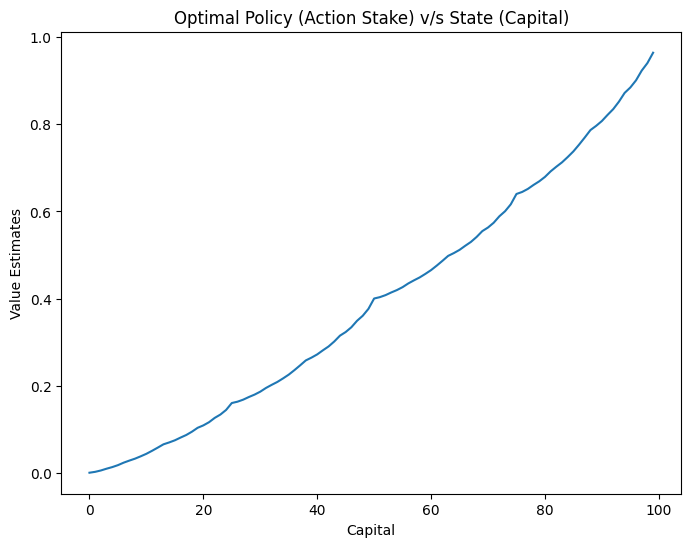

In [ ]:
#Plotting Optimal Policy v/s State
x = range(100)
y = Value_1[:100]
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Optimal Policy (Action Stake) v/s State (Capital)')
plt.show()

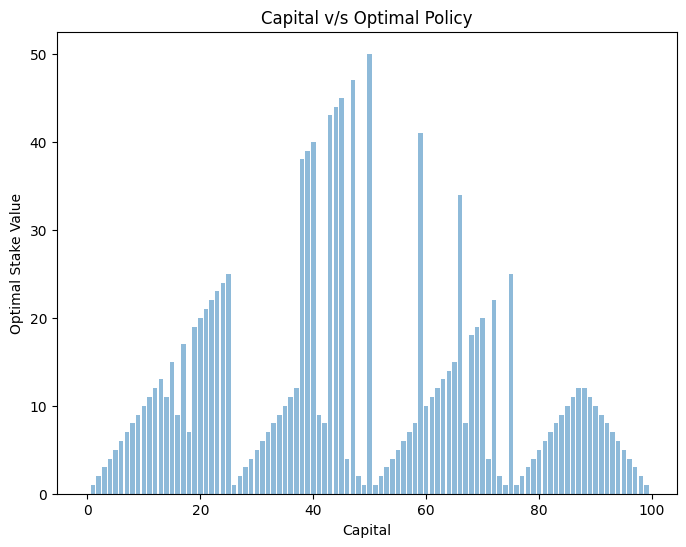

In [ ]:
#Plotting State v/s Optimal Policy
x = range(100)
y = policy_1
plt.figure(figsize=(8,6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Optimal Stake Value')
plt.title('Capital v/s Optimal Policy')
plt.show()

**Probability of Head = 0.25**

In [ ]:
policy_2, Value_2 = gamblers_prob_val_it(0.25)
print("Optimized Policy:")
print(policy_2)

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [ ]:
print("Optimized Value Function:")
print(Value_2)

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02
 8.96225423e-02 9.58723575e-02 1.09538078e-01 1.10939329e-01
 1.13360151e-01 1.18457374e-01 1.21977661e-01 1.29716907e-01
 1.44653559e-01 1.47520113e-01 1.53983246e-01 1.70990169e-01
 1.77987434e-01 1.95990576e-01 2.50000000e-01 2.50217438e-01
 2.50870078e-01 2.52085772e-01 2.53496606e-01 2.55313534e-01
 2.58343089e-01 2.62109832e-01 2.63988460e-01 2.66803548e-01
 2.71254137e-01 2.77122542e-01 2.83372357e-01 2.97038078e-0

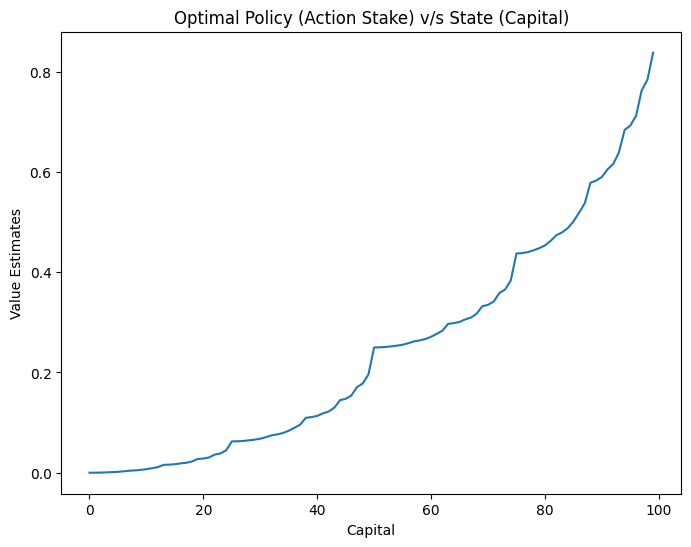

In [ ]:
#Plotting Optimal Policy v/s State
x = range(100)
y = Value_2[:100]
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Optimal Policy (Action Stake) v/s State (Capital)')
plt.show()

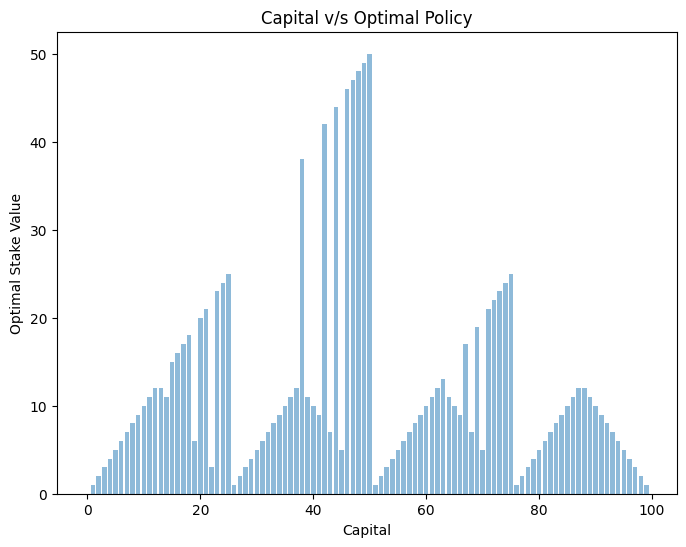

In [ ]:
#Plotting State v/s Optimal Policy
x = range(100)
y = policy_2
plt.figure(figsize=(8,6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Optimal Stake Value')
plt.title('Capital v/s Optimal Policy')
plt.show()

**Probability of Head = 0.55**

In [ ]:
policy_3, Value_3 = gamblers_prob_val_it(0.55)
print("Optimized Policy:")
print(policy_3)

Optimized Policy:
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [ ]:
print("Optimized Value Function:")
print(Value_3)

Optimized Value Function:
[0.         0.17907988 0.3256451  0.44562338 0.54386112 0.62432055
 0.69024101 0.74427075 0.78857479 0.82492306 0.8547625  0.87927601
 0.89943065 0.916017   0.92968144 0.94095243 0.95026207 0.95796371
 0.96434629 0.96964617 0.97405667 0.97773597 0.98081353 0.98339531
 0.9855681  0.98740299 0.98895822 0.9902816  0.99141231 0.99238257
 0.99321882 0.99394285 0.99457258 0.99512281 0.99560577 0.99603155
 0.99640856 0.99674375 0.99704294 0.99731096 0.9975519  0.99776916
 0.99796564 0.99814377 0.99830564 0.99845302 0.99858745 0.99871025
 0.99882255 0.99892537 0.99901957 0.99910594 0.99918515 0.99925782
 0.99932449 0.99938566 0.99944178 0.99949324 0.99954041 0.99958363
 0.9996232  0.99965942 0.99969253 0.99972279 0.99975041 0.99977559
 0.99979853 0.99981941 0.99983838 0.99985561 0.99987123 0.99988537
 0.99989815 0.9999097  0.99992011 0.99992947 0.99993789 0.99994544
 0.9999522  0.99995825 0.99996364 0.99996844 0.99997271 0.99997649
 0.99997983 0.99998278 0.99998538 0.

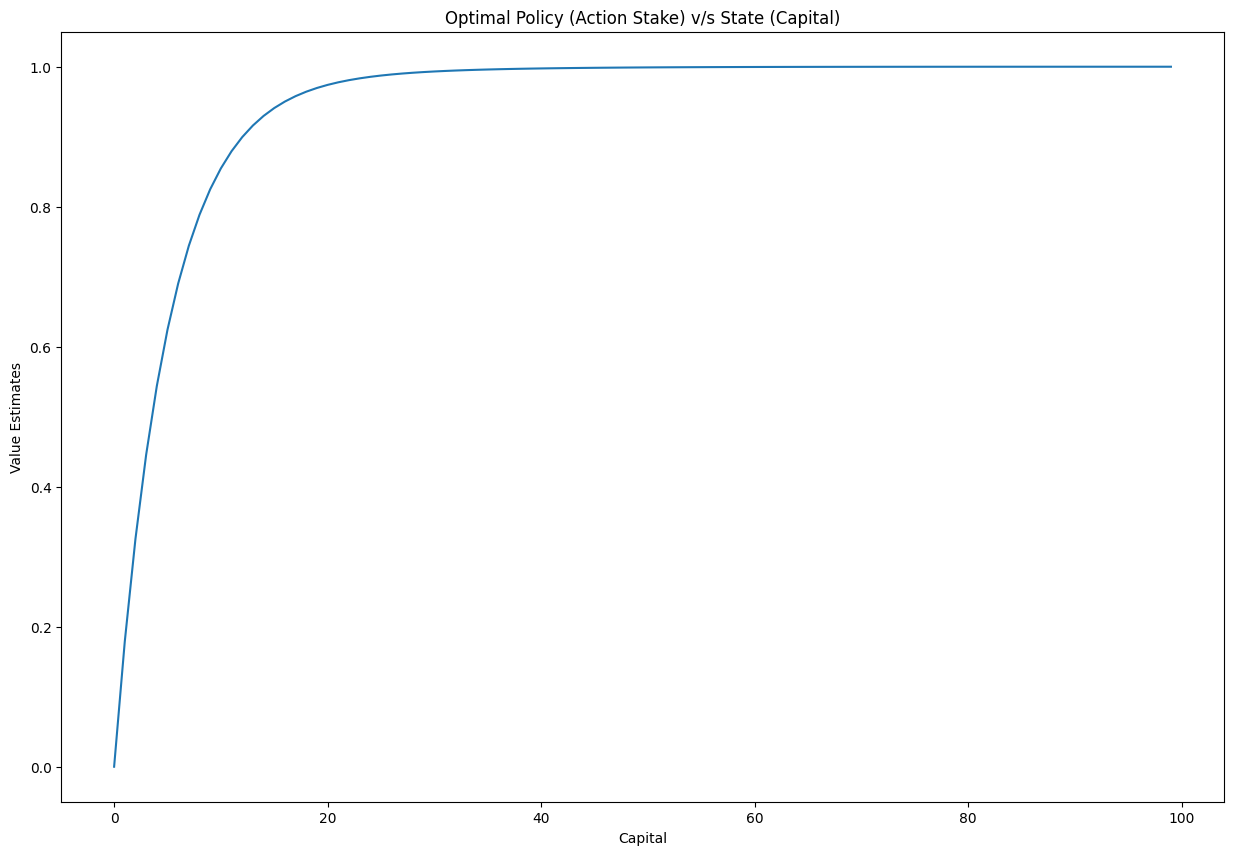

In [ ]:
#Plotting Optimal Policy v/s State
x = range(100)
y = Value_3[:100]
plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Optimal Policy (Action Stake) v/s State (Capital)')
plt.show()

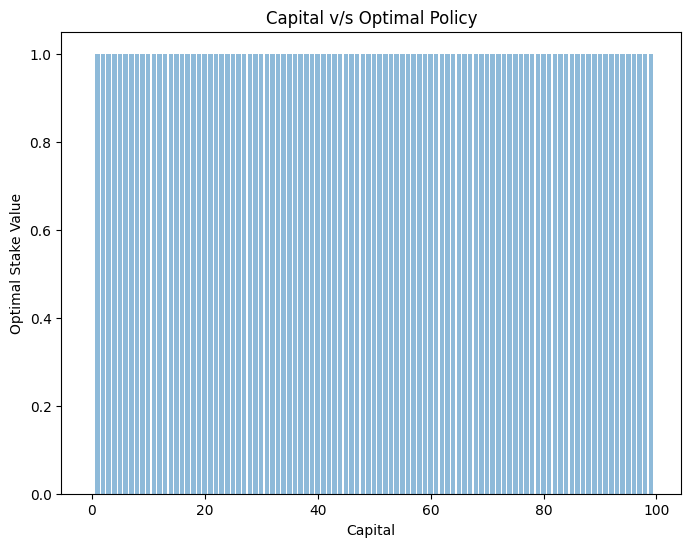

In [ ]:
#Plotting State v/s Optimal Policy
x = range(100)
y = policy_3
plt.figure(figsize=(8,6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Optimal Stake Value')
plt.title('Capital v/s Optimal Policy')
plt.show()

**Comparing Plots for all Three Probabilities**

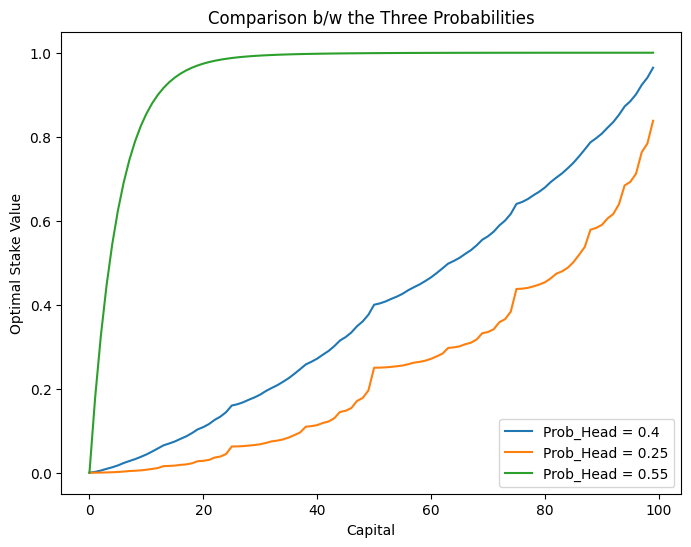

In [ ]:
x = range(100)
y1 = Value_1[:100]
y2 = Value_2[:100]
y3 = Value_3[:100]
plt.figure(figsize=(8,6))
plt.plot(x, y1, label = "Prob_Head = 0.4")
plt.plot(x, y2, label = "Prob_Head = 0.25")
plt.plot(x, y3, label = "Prob_Head = 0.55")
plt.xlabel('Capital')
plt.ylabel('Optimal Stake Value')
plt.title('Comparison b/w the Three Probabilities')
plt.legend()
plt.show()